# How might the combination of empty homes and Airbnb listings affect London's housing provision? 

Module Name: Introduction to Programming for Spatial Analysts  
Module Code: CASA0013  
Student Number: 20205972  
Student Name: Yasmine Hujair  
Title: How might the combination of empty homes and Airbnb listings affect London's housing provision?  
Word Count: 2493

## Executive Summary

Interest in the effect of Airbnb in cities has been growing in the last few years. Traditionally, central areas attract tourism, as a result the majority of Airbnb listings are concentrated in these areas. However, in addition to this issue, empty homes in London rose 11% in 2018 alone (Action on Empty Homes, 2019). This has been identified as a growing problem, largely attributed to value of London homes and foreign investment (Cobbold, 2007). These two elements of growing concern are also difficult to monitor. This report is intended to provide insight to the Mayor of London on the potential combined effects of empty homes and ‘entire home’ Airbnb listings in London. The report aims to identify if there is an opportunity to reduce housing targets by tackling the two issues.  
  
Legislation brought in in 2017 states any 'entire home' cannot be let for more than 90 days without permission from the local authority (Key Nest, 2019). Analysis from Temperton, 2020 suggests 23% of London homes listed on Airbnb in February 2020 are in breach of the 90-day limit. This suggests that current methods for monitoring Airbnb are not sufficient and the current operations are likely to negatively impact housing in London. Additionally, empty and second homes may constitute a significant part of the housing crisis.
Action on Empty Homes, 2020 suggests there may be 100,000 'empty or underutilised properties' in London, including second homes and Airbnb listings. As the draft London Plan (Mayor of London, 2019) indicates ten-year housing targets of over 500,000 in Greater London, it is possible a fifth of this target could be comprised of existing homes. It is possible there is an opportunity to reclaim London for the residents and tackle the affordable housing shortage.  
  
This report focuses on the density of 'entire home' listings and empty homes as a proportion of the total number of homes in each borough. There are more empty homes and ‘entire home’ Airbnb listings in Kensington and Chelsea than the ten-year housing target for the borough. Inner London boroughs have the largest opportunity to reclaim housing for residents. Some outer boroughs to the south-west also have some opportunity. The analysis suggests that residents are being pushed further away from the centre by both Airbnb listings and the empty homes problem.   
  
There is clear evidence that tackling empty homes and the misuse of Airbnb is an opportunity to significantly aid the initiative for supplying housing in London. There is some spatial correlation between empty homes and 'entire home' Airbnb listings. The results indicate the problem is significant in a small number of boroughs but is not significant in the majority. It is possible that this problem will worsen due to evidence of non-compliance on Airbnb and no clear method for monitoring in the future.  
  
Additional analysis on this situation over time may be useful to predict future outcomes to inform policy. Scenario planning is advised given uncertainty in the current climate due to Brexit and the Covid-19 Pandemic. Analysis of geodemographics from the 2021 Census and it's change from the 2011 Census will be valuable in comprehending wealth disparity and migration between inner and outer London. Additionally, data collection on Airbnb and empty homes would benefit from regular updates and methodological improvement.  
  
Finally, a review on policy relating to second homes and foreign investors is recommended, with the key aim of understanding how to reduce the likelihood for continued foreign investment in central London. The review should include an economic appraisal of benefits Airbnb bring to London in comparison to the negative impacts outlined in this report. Foreign investment is not inherently negative and does not explicitly create a problem of empty homes, but it should be considered with the wider implications of housing in London. The focus should be on second and empty homes.


# Reproducible Analysis

## Loading the data

In [7]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import re
import os
from shapely.geometry import Point
from geopandas import datasets, GeoDataFrame, read_file
from geopandas.tools import overlay


import sklearn
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from esda.adbscan import ADBSCAN
from sklearn.metrics import r2_score

from matplotlib.colors import ListedColormap
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.pyplot as plt



import random
random.seed(42)    # For reproducibility
np.random.seed(42) # For reproducibility

# Make numeric display a bit neater
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

#visualisation set
sns.set(style="whitegrid", palette="pastel", color_codes=True) 
sns.mpl.rc("figure", figsize=(10,6))

from IPython.display import HTML


In [8]:
import os
from requests import get
from urllib.parse import urlparse

def cache_data(src:str, dest:str) -> str:
    """Downloads and caches a remote file locally.
    
    The function sits between the 'read' step of a pandas or geopandas
    data frame and downloading the file from a remote location. The idea
    is that it will save it locally so that you don't need to remember to
    do so yourself. Subsequent re-reads of the file will return instantly
    rather than downloading the entire file for a second or n-th itme.
    
    Parameters
    ----------
    src : str
        The remote *source* for the file, any valid URL should work.
    dest : str
        The *destination* location to save the downloaded file.
        
    Returns
    -------
    str
        A string representing the local location of the file.
    """
    
    url = urlparse(src) # We assume that this is some kind of valid URL 
    fn  = os.path.split(url.path)[-1] # Extract the filename
    dfn = os.path.join(dest,fn) # Destination filename
    
    # Check if dest+filename does *not* exist -- 
    # that would mean we have to download it!
    if not os.path.isfile(dfn):
        
        print(f"{dfn} not found, downloading!")

        # Convert the path back into a list (without)
        # the filename -- we need to check that directories
        # exist first.
        path = os.path.split(dest)
        
        # Create any missing directories in dest(ination) path
        # -- os.path.join is the reverse of split (as you saw above)
        # but it doesn't work with lists... so I had to google how
        # to use the 'splat' operator! os.makedirs creates missing
        # directories in a path automatically.
        if len(path) >= 1 and path[0] != '':
            os.makedirs(os.path.join(*path), exist_ok=True)
            
        # Download and write the file
        with open(dfn, "wb") as file:
            response = get(src)
            file.write(response.content)
            
        print('Done downloading...')

    else:
        print(f"Found {dfn} locally!")

    return dfn

In [9]:
# Set download URL
ddir  = os.path.join('data') # destination directory
url = 'http://data.insideairbnb.com/united-kingdom/england/london/2019-05-05/data/listings.csv.gz'
airbnb = pd.read_csv(cache_data(url, ddir) )
print(f"Data frame is {airbnb.shape[0]:,} x {airbnb.shape[1]}")

Found data\listings.csv.gz locally!
Data frame is 80,767 x 106


C:\Users\Yasmine Hujair\anaconda32020\envs\SpatialData\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
# Set download URL
url = 'https://raw.githubusercontent.com/YHuj20/i2pBriefing/main/Data/All-longterm-vacant-dwellings.csv'
# Read in data from github
emptyhomes = pd.read_csv(url, low_memory=False)
emptyhomes = emptyhomes[emptyhomes['2018'].notna()]

In [11]:
# Set download URL
url = 'https://raw.githubusercontent.com/YHuj20/i2pBriefing/main/Data/Total-dwellings-per-borough.csv'
# Read in data from github
totalhomes = pd.read_csv(url, low_memory=False)

In [12]:
#Read in housing targets per borough
url = 'https://raw.githubusercontent.com/YHuj20/i2pBriefing/main/Data/Housing-targets-per-borough.csv'
housingtargets = pd.read_csv(url, low_memory=False)

In [5]:
#Read in boroughs geopackage
ddir  = os.path.join('data','geo') # destination directory

boros = gpd.read_file( cache_data('https://github.com/YHuj20/i2pBriefing/blob/main/Data/geo/Boroughs.gpkg', ddir) )
print('Done.')

Found data\geo\Boroughs.gpkg locally!
Done.


C:\Users\Yasmine Hujair\anaconda32020\envs\SpatialData\lib\site-packages\geopandas\geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


## Data wrangling

In [6]:
airbnb.groupby(['neighbourhood_cleansed','room_type']).count()

NameError: name 'airbnb' is not defined

In [9]:
#pivoting table for analysis
typecount = airbnb.pivot_table('id', 'neighbourhood_cleansed', 'room_type', aggfunc='count', fill_value=0)
typecount = typecount.rename(columns={"Entire home/apt" : "Entire_Home" , "Private room": "Private_Room", "Shared room": "Shared_Room"})
# creating percentage columns
typecount['Percent_Entire_Home'] = typecount.Entire_Home/typecount.Entire_Home.sum()
typecount['Percent_Private_Room'] = typecount.Private_Room/typecount.Private_Room.sum()
typecount['Percent_Shared_Room'] = typecount.Shared_Room/typecount.Shared_Room.sum()
typecount['LAD_Name'] = typecount.index
typecount.sample(12, random_state = 42)

room_type,Entire_Home,Private_Room,Shared_Room,Percent_Entire_Home,Percent_Private_Room,Percent_Shared_Room,LAD_Name
neighbourhood_cleansed,,,,,,,
Wandsworth,2243,1827,12,0.05,0.05,0.02,Wandsworth
Havering,83,135,1,0.00,0.00,0.00,Havering
Richmond upon Thames,625,520,2,0.01,0.01,0.00,Richmond upon Thames
Hounslow,434,559,5,0.01,0.02,0.01,Hounslow
Ealing,694,894,11,0.02,0.03,0.01,Ealing
Enfield,203,372,12,0.00,0.01,0.02,Enfield
Kensington and Chelsea,4667,1024,32,0.10,0.03,0.04,Kensington and Chelsea
Lambeth,2348,2281,49,0.05,0.07,0.07,Lambeth
Hammersmith and Fulham,2504,1512,27,0.06,0.04,0.04,Hammersmith and Fulham


In [10]:
#Join datasets by LA name
#calculate density of entire homes against total homes per borough

typecount=typecount.set_index('LAD_Name').join(totalhomes.set_index('Local Authority'))
typecount['Density_of_Entire_Homes'] = typecount['Entire_Home']/typecount['2018']
typecount['LAD_Name'] = typecount.index

In [11]:
#Entire Homes Locations
entirehomeslatlong = airbnb[['latitude', 'longitude', 'room_type','availability_365']].copy()

### Wrangling boroughs and creating geodataframe

In [12]:
#checking projection
print(boros.crs)

epsg:27700


In [13]:
#creating the geodataframe
geotypes=typecount.set_index('ONS code').join(boros.set_index('GSS_CODE'))
gdf = gpd.GeoDataFrame(geotypes, crs = "epsg:27700")

## Results Analysis

### Mapping entire homes listings in London

<AxesSubplot:>

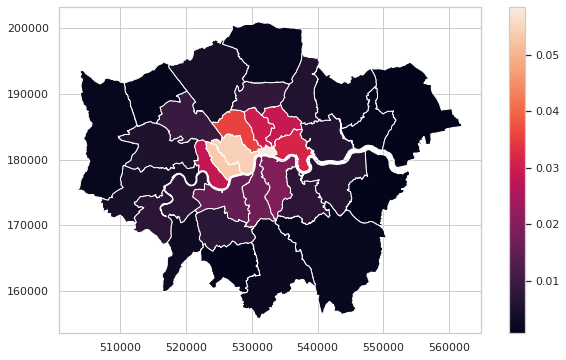

In [15]:
fig, ax = plt.subplots(1,1)

gdf.plot(column = 'Density_of_Entire_Homes',
        ax=ax, 
        legend=True,
         legend_kwds={'label': "Percentage 'Entire Homes' Listings",'orientation': "horizontal"})

Evidentally, the majority of entire homes listings are in Westminster

### Mapping empty homes in London

In [17]:
#Creating columng of density of empty homes out of total number of homes 
emptyhomes['Density of Empty Homes'] = emptyhomes['2018']/totalhomes['2018']
emptyhomes.columns = emptyhomes.columns.map(lambda x: str(x) + '_empty')

In [18]:
#joining empty homes to the geodataframe
geotypes=geotypes.set_index('LAD_Name').join(emptyhomes.set_index('Area_empty'))
gdf = gpd.GeoDataFrame(geotypes, crs = "epsg:27700")

<AxesSubplot:>

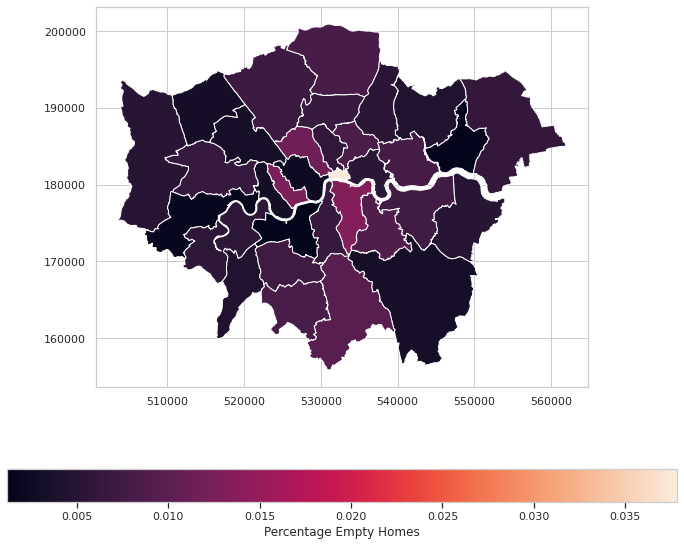

In [51]:
fig, ax = plt.subplots(1,1)

gdf.plot(column = 'Density of Empty Homes_empty',
        ax=ax, 
        legend=True,
         legend_kwds={'label': "Percentage Empty Homes",'orientation': "horizontal"})

### Mapping empty homes and 'entire homes' listings in London

In [20]:
geotypes['Total empty and entire homes 2018'] = geotypes['Entire_Home']+geotypes['2018_empty']
geotypes['Percent Unavailable 2018'] = geotypes['Total empty and entire homes 2018'] / geotypes['2018']
geotypes['Total empty and entire homes 2019'] = geotypes['Entire_Home']+geotypes['2019_empty']
geotypes['Percent Unavailable 2019'] = geotypes['Total empty and entire homes 2019'] / geotypes['2018']
geotypes['Density of Entire Homes_abnb'] = geotypes['Entire_Home']/geotypes['2018']

<AxesSubplot:>

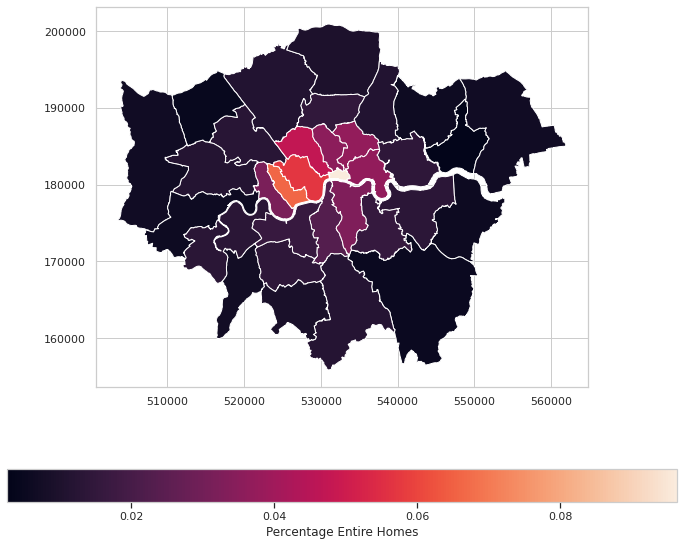

In [50]:
#Mapping 2018 data
gdf = gpd.GeoDataFrame(geotypes, crs = "epsg:27700")

fig, ax = plt.subplots(1,1)

gdf.plot(column = 'Percent Unavailable 2018',
        ax=ax, 
        legend=True,
         legend_kwds={'label': "Percentage Empty and Entire Homes (2018)",'orientation': "horizontal"})

<AxesSubplot:>

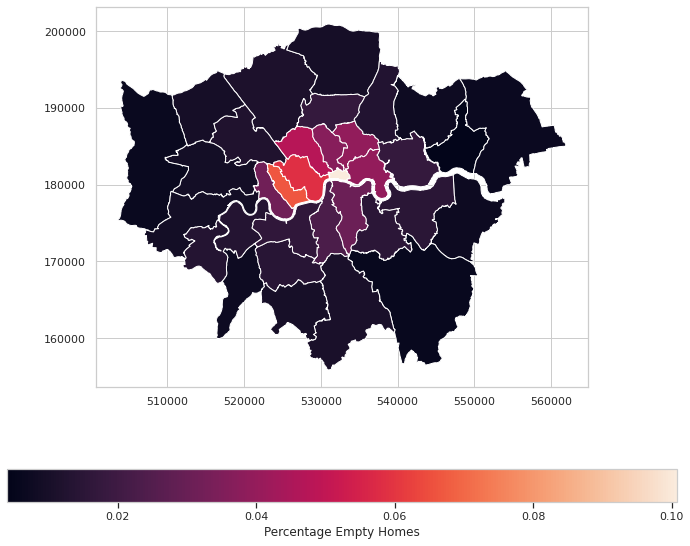

In [49]:
#Mapping 2019 data
gdf = gpd.GeoDataFrame(geotypes, crs = "epsg:27700")

fig, ax = plt.subplots(1,1)

gdf.plot(column = 'Percent Unavailable 2019',
        ax=ax, 
        legend=True,
         legend_kwds={'label': "Percentage Empty and Entire Homes (2019)",'orientation': "horizontal"})

## Is there a relationship between empty homes and 'entire home' Airbnb listings per borough?

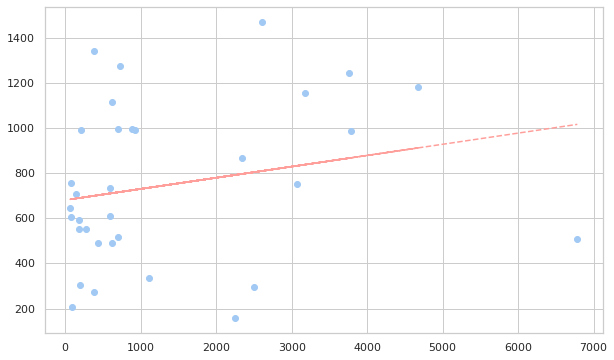

Text(0.5, 0, 'Number of Entire  Homes')

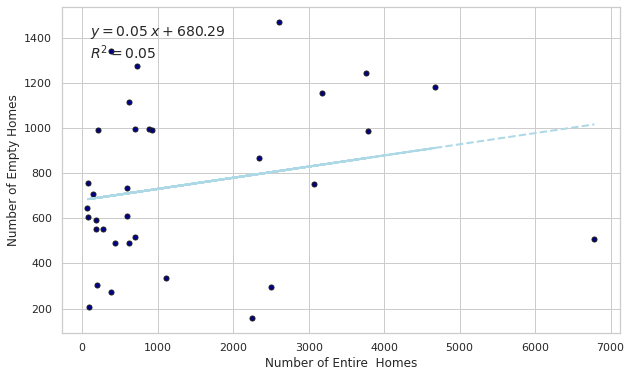

In [23]:
#Is there a relationship between empty homes and entire homes per borough?

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 
ax.set_facecolor('xkcd:white')

x = geotypes['Entire_Home']
y = geotypes['2019_empty']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

#add the rsq and equation of the line

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 
ax.set_facecolor('xkcd:white')

plt.plot(x,y,"o", ms=5, mec="k", color = 'darkblue')
z = np.polyfit(x, y, 1)
y_hat = np.poly1d(z)(x)

plt.plot(x, y_hat, "r--", lw=2, color='lightblue')
text = f"$y={z[0]:0.2f}\;x{z[1]:+0.2f}$\n$R^2 = {r2_score(y,y_hat):0.2f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top')
ax.set_ylabel('Number of Empty Homes')
ax.set_xlabel('Number of Entire  Homes')

# 

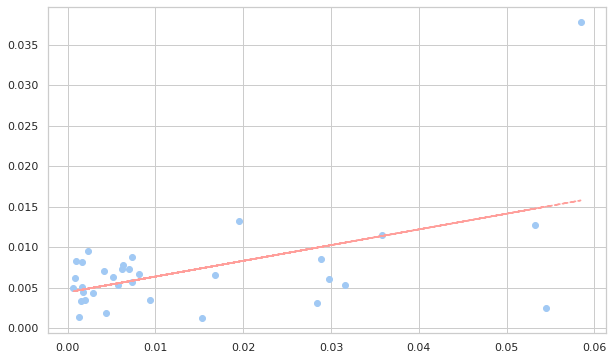

Text(0.5, 0, 'Density of Entire Homes')

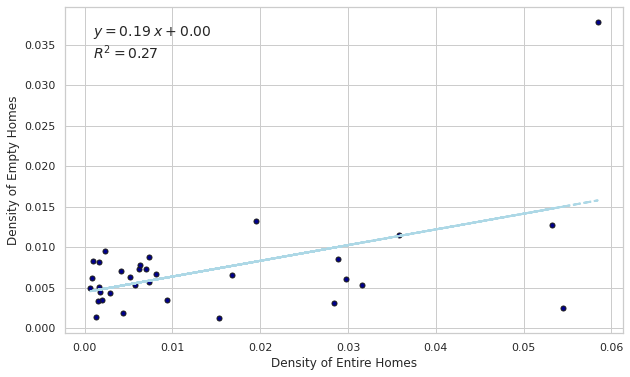

In [24]:
#Is there a relationship between density of empty homes and entire homes per borough?

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 
ax.set_facecolor('xkcd:white')

x = geotypes['Density of Entire Homes_abnb']
y = geotypes['Density of Empty Homes_empty']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

#add the rsq and equation of the line

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 
ax.set_facecolor('xkcd:white')

plt.plot(x,y,"o", ms=5, mec="k", color = 'darkblue')
z = np.polyfit(x, y, 1)
y_hat = np.poly1d(z)(x)

plt.plot(x, y_hat, "r--", lw=2, color='lightblue')
text = f"$y={z[0]:0.2f}\;x{z[1]:+0.2f}$\n$R^2 = {r2_score(y,y_hat):0.2f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top')
ax.set_ylabel('Density of Empty Homes')
ax.set_xlabel('Density of Entire Homes')

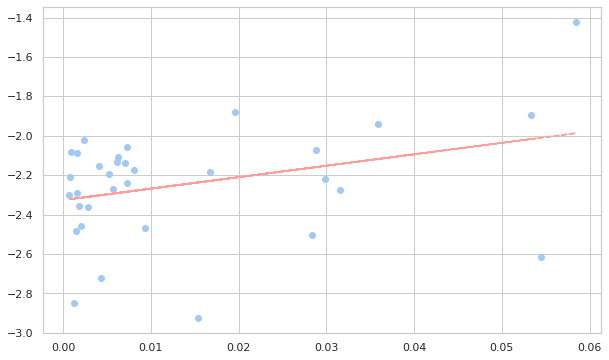

Text(0.5, 0, 'Density of Entire Homes')

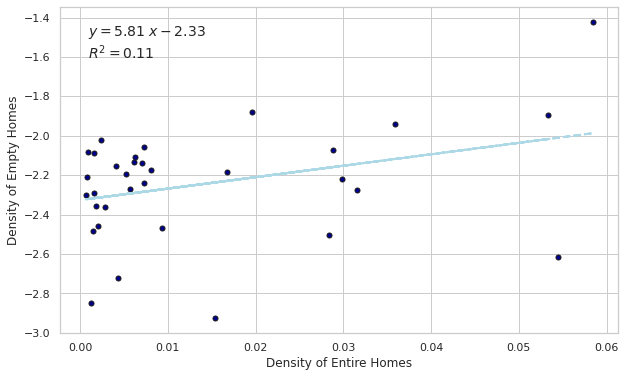

In [25]:
#Check if there's a relationship between log of empty homes and entire homes listings
#Transform empty homes axis to log
geotypes['logemptyhomes'] = np.log10(geotypes['Density of Empty Homes_empty'])

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 
ax.set_facecolor('xkcd:white')

x = geotypes['Density of Entire Homes_abnb']
y = geotypes['logemptyhomes']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

#add the rsq and equation of the line

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 
ax.set_facecolor('xkcd:white')

plt.plot(x,y,"o", ms=5, mec="k", color = 'darkblue')
z = np.polyfit(x, y, 1)
y_hat = np.poly1d(z)(x)

plt.plot(x, y_hat, "r--", lw=2, color='lightblue')
text = f"$y={z[0]:0.2f}\;x{z[1]:+0.2f}$\n$R^2 = {r2_score(y,y_hat):0.2f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top')
ax.set_ylabel('Density of Empty Homes')
ax.set_xlabel('Density of Entire Homes')

As the $R^{2}$ value is lower the relationship is linear

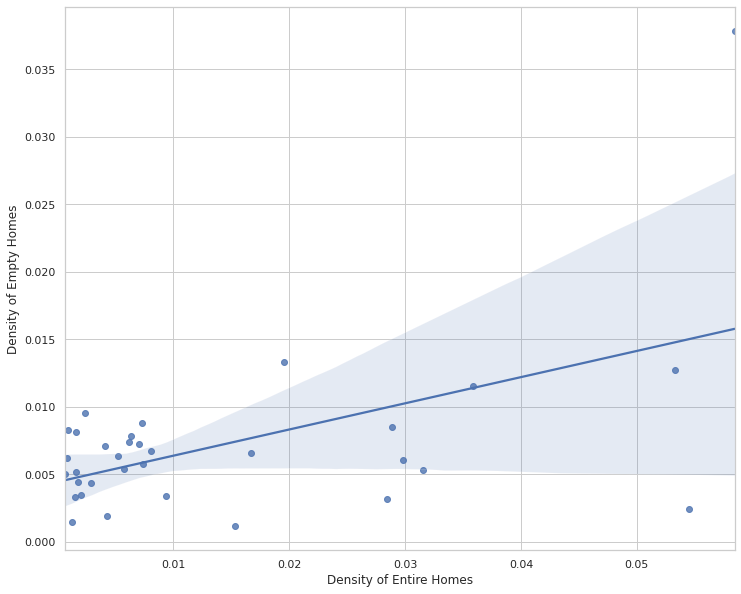

In [26]:
sns.set_theme(color_codes=True)
sns.set(font_scale=1.1)
sns.set(rc={'figure.figsize':(12,10)})
sns.set_style("whitegrid")
ax = sns.regplot(x='Density of Entire Homes_abnb', y = 'Density of Empty Homes_empty', data=geotypes)
ax.set(xlabel='Density of Entire Homes', ylabel='Density of Empty Homes')
plt.show()

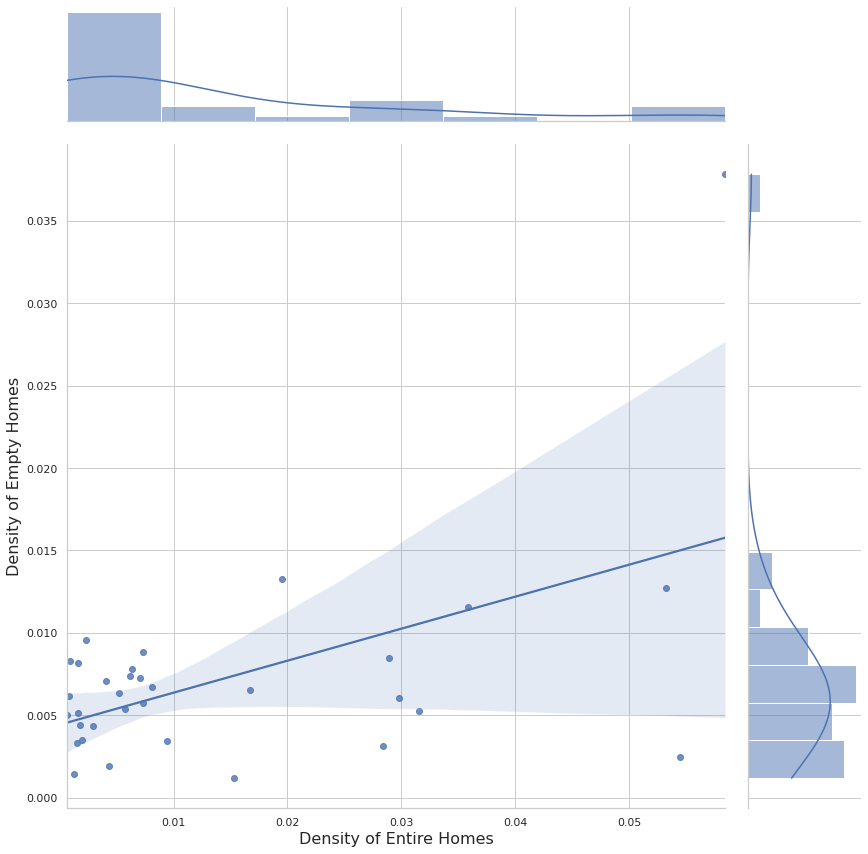

In [27]:
sns.set_style("whitegrid")
ax = sns.jointplot(x='Density of Entire Homes_abnb', y = 'Density of Empty Homes_empty', data=geotypes, kind='reg', height=12)
ax.set_axis_labels('Density of Entire Homes', ylabel='Density of Empty Homes', fontsize=16)
plt.show()

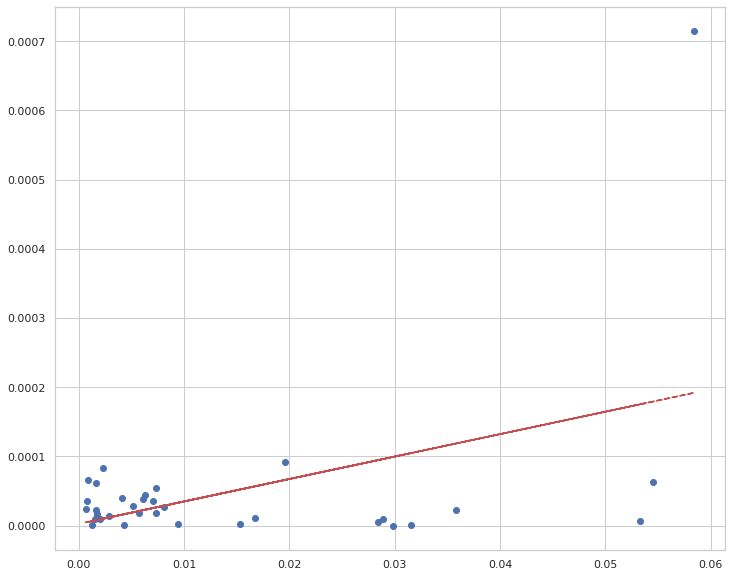

Text(0.5, 0, 'Density of Entire Homes')

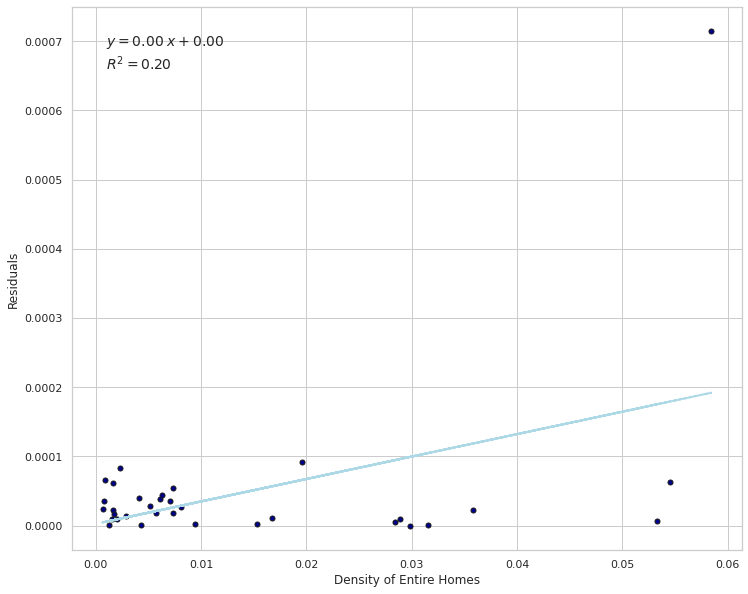

In [28]:
#Plot the residuals
geotypes['Density Fitted Line'] = (0.19*geotypes['Density of Entire Homes_abnb'])
geotypes['Residuals'] = geotypes['Density of Empty Homes_empty'] - geotypes['Density Fitted Line']
geotypes['ResidualsSQ'] = (geotypes['Residuals']**2)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 
ax.set_facecolor('xkcd:white')

x = geotypes['Density of Entire Homes_abnb']
y = geotypes['ResidualsSQ']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

#add the rsq and equation of the line

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 
ax.set_facecolor('xkcd:white')

plt.plot(x,y,"o", ms=5, mec="k", color = 'darkblue')
z = np.polyfit(x, y, 1)
y_hat = np.poly1d(z)(x)

plt.plot(x, y_hat, "r--", lw=2, color='lightblue')
text = f"$y={z[0]:0.2f}\;x{z[1]:+0.2f}$\n$R^2 = {r2_score(y,y_hat):0.2f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top')
ax.set_ylabel('Residuals')
ax.set_xlabel('Density of Entire Homes')

## How does this compare to the housing targets in London?

In [29]:
#Pull in opportunity areas geopackage from GLA 
ddir  = os.path.join('data','geo') # destination directory

OppAreas = gpd.read_file( cache_data('https://github.com/YHuj20/i2pBriefing/blob/main/Data/geo/Opportunity_Areas.gpkg', ddir) )
print('Done.')

Found data/geo/Opportunity_Areas.gpkg locally!
Done.


In [30]:
geotypes['Borough'] = geotypes.index
housingtargets = geotypes.set_index('Borough').join(housingtargets.set_index('Borough'))
housingtargets['Difference'] = housingtargets['Draft London Plan Housing Targets'] - housingtargets['Total empty and entire homes 2019']


In [31]:
housingtargets['Borough'] = housingtargets.index

In [32]:
barplot= pd.concat([housingtargets['Borough'], housingtargets['Draft London Plan Housing Targets'], housingtargets['Total empty and entire homes 2019']], axis=1, keys=['Borough','Draft London Plan Housing Targets', 'Total empty and entire homes 2019'])
barplot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, Barking and Dagenham to Westminster
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Borough                            33 non-null     object 
 1   Draft London Plan Housing Targets  33 non-null     int64  
 2   Total empty and entire homes 2019  33 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.3+ KB


In [33]:
barplot= pd.melt(barplot, id_vars=['Borough'], value_vars=['Draft London Plan Housing Targets', 'Total empty and entire homes 2019'])
barplot.head()

,Borough,variable,value
0,Barking and Dagenham,Draft London Plan Housing Targets,"19,440.00"
1,Barnet,Draft London Plan Housing Targets,"23,640.00"
2,Bexley,Draft London Plan Housing Targets,"6,850.00"
3,Brent,Draft London Plan Housing Targets,"23,250.00"
4,Bromley,Draft London Plan Housing Targets,"7,740.00"


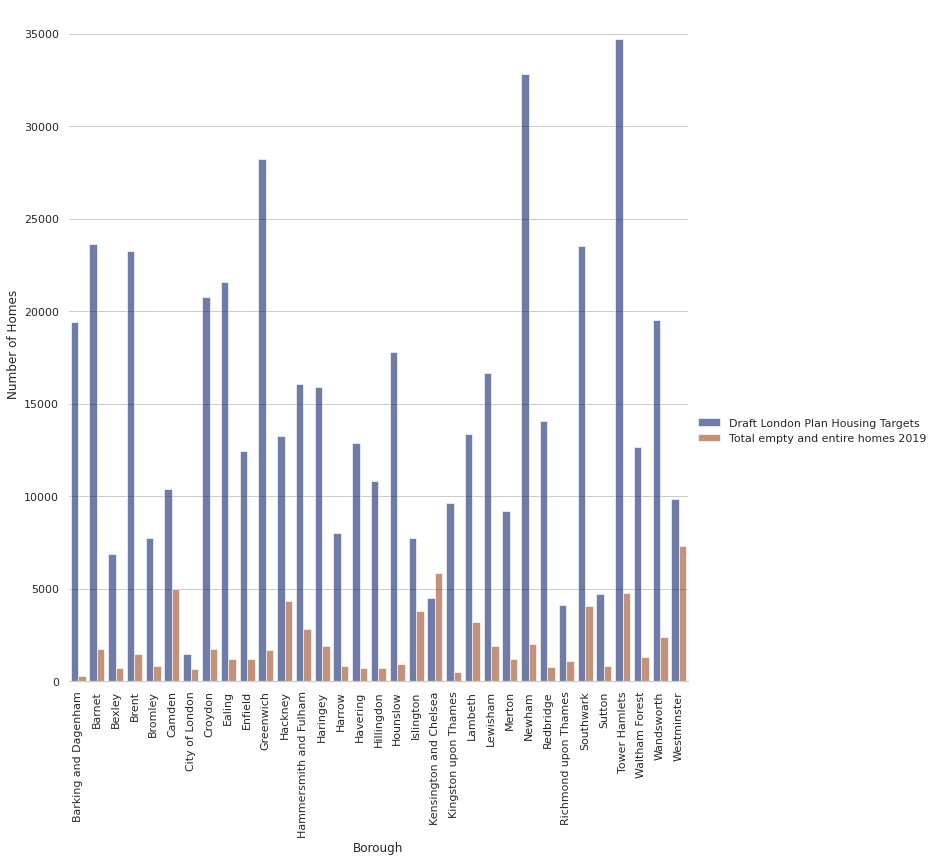

In [34]:
#Plot the bar chart

sns.set_style("whitegrid")

# Draw a nested barplot by borough
g = sns.catplot(
    data=barplot, kind="bar",
    x="Borough", y="value", hue="variable",
    ci="sd", palette="dark", alpha=.6, height=10
)
g.despine(left=True)
g.set_axis_labels("Borough", "Number of Homes")
g.set_xticklabels(rotation=90)
g.legend.set_title("")

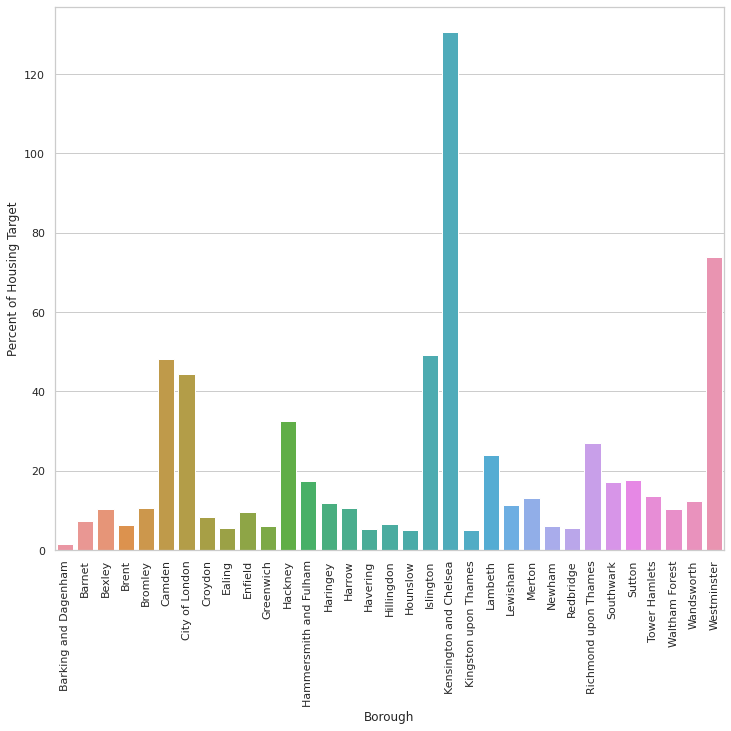

In [35]:
#Calculate the total empty and entire homes listings as a proporiton of the housing target for each borough
housingtargets['Percent of Housing Target'] = housingtargets['Total empty and entire homes 2019']/housingtargets['Draft London Plan Housing Targets']
housingtargets['Percent of Housing Target'] = housingtargets['Percent of Housing Target']*100
#plot the bar chart
ax = sns.barplot(x="Borough", y="Percent of Housing Target", data=housingtargets)
plt.xticks(rotation=90)
plt.show()

In [44]:
#Mapping the proportions of housing targets

#Create new dataframe with required data
housingtargetsanalysis = housingtargets[['Borough','Draft London Plan Housing Targets','Percent of Housing Target']].copy()

#join data to geodata frame and create gdf
geotypes=geotypes.set_index('Borough').join(housingtargetsanalysis.set_index('Borough'))


<AxesSubplot:>

<Figure size 864x720 with 0 Axes>

<AxesSubplot:>

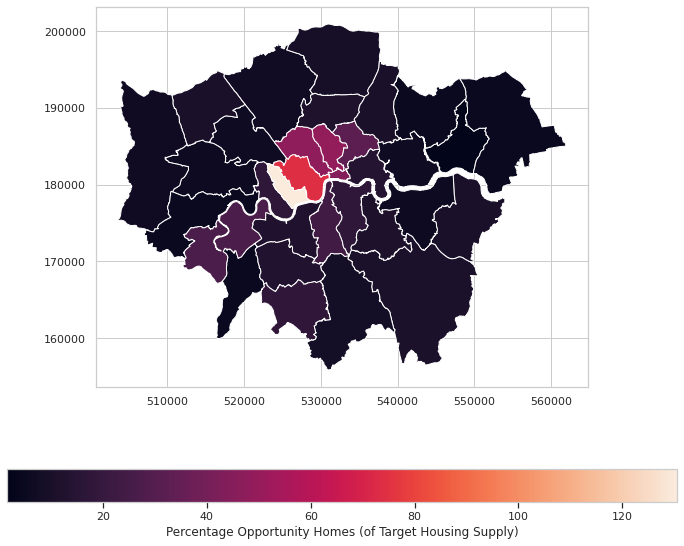

In [53]:
#Mapping the data
gdf = gpd.GeoDataFrame(geotypes, crs = "epsg:27700")

fig, ax = plt.subplots(1,1)

gdf.plot(column = 'Percent of Housing Target',
        ax=ax, 
        legend=True,
         legend_kwds={'label': "Percentage Opportunity Homes (of Target Housing Supply)",'orientation': "horizontal"})

## Acknowledgements 

Thank you to the Centre for Advanced Spatial Analysis (CASA) at UCL who have taught me the spatial analysis techniques used in this analysis, in particular Dr Jon Reades, Dr Hannah Fry and Huanfa Chen. 

# How might the combination of empty homes and Airbnb listings affect London's housing provision? 

## Introduction

Interest in the effect of Airbnb in cities has been growing in the last few years. Traditionally, central areas attract tourism, as a result the majority of Airbnb listings are concentrated in these areas. However, in addition to this issue, empty homes in London rose 11% in 2018 alone (Action on Empty Homes, 2019). This has been identified as a growing problem, largely attributed to value of London homes and foreign investment (Cobbold, 2007). These two elements of growing concern are also difficult to monitor.  
  
The draft London Plan (Mayor of London, 2019) indicates ten-year housing targets of over 500,000 in Greater London. This report is intended to provide insight to the Mayor of London on the potential combined effects of empty homes and ‘entire home’ Airbnb listings in London. The report aims to identify if there is an opportunity to reduce housing targets by tackling the two issues.



## Background

### Airbnb in London

Airbnb in London has been subject to scrutiny in the past. Legislation brought in in 2017 states any 'entire home' cannot be let for more than 90 days without permission from the local authority (Key Nest, 2019). Airbnb 'entire homes' listings were viewed as a growing problem in the city, as almost 80,000 homes were listed in London in December 2019, leading to claims it exacerbates the rising rental prices (Wilmore, 2020). Airbnb has capped bookings in London through its platform at 90 days, however it is possible hosts can find ways to re-list their property. Analysis from Temperton, 2020 suggests 23% of homes listed in February 2020 are in breach of the 90-day limit. This suggests that the methods for monitoring Airbnb are not sufficient and the current operations are likely to negatively impact housing in London.

### Empty Homes

The number of empty homes in London is rising (Action on Empty Homes, 2020) with many blaming foreign investors. The central London housing market is a particularly attractive investment. However, it is believed by Action on Empty Homes, 2020 that although foreign investors perpetuate the issue, it is a much broader problem than this. Empty and second homes may constitute a significant part of the housing crisis.

### The New London Plan and Housing Targets

Action on Empty Homes, 2020 suggests there may be 100,000 'empty or underutilised properties' in London, including second homes and Airbnb listings. A link has been drawn between the two problems. As the draft London Plan (Mayor of London, 2019) indicates ten-year housing targets of over 500,000 in Greater London, it is possible a fifth of this target could be comprised of existing homes. It is possible there is an opportunity to reclaim London for the residents and tackle the affordable housing shortage.

## Data Sources

The following data has been used in this analysis:
* [Vacant Dwellings data](https://data.london.gov.uk/dataset/vacant-dwellings) - 2012-2019  - Greater London Authority (GLA)    
* [Inside Airbnb (IA) data](http://insideairbnb.com/get-the-data.html) - May 2019 - IA   
* [London Boroughs](https://data.london.gov.uk/dataset/london_boroughs) - 2019 - GLA
* [Total Number of Homes data](https://data.london.gov.uk/dataset/net-additional-dwellings-borough) - 2019 - GLA  
* [London Housing Targets](https://www.london.gov.uk/what-we-do/planning/london-plan/new-london-plan/publication-london-plan) - 2019 - Mayor of London

It is important to note that as the IA data is collected using a web scraper, it is limited by the level of detail provided by each host. IA began collecting data, using a web scraper, and publishing it on their website to provide transparency on the impact Airbnb has on housing and the potential misuse of the platform (“Inside Airbnb” n.d.). The founder is an activist against Airbnb, which may influence the collection methodology and how the data has been analysed before being published on the website. In addition, the web scraping method is limited by the level of detail provided by each host. Therefore, discerning hosts who let properties for more than 90 days is not simple. In this analysis, all listings of entire homes are counted, but it is not known whether each property is lived in.  
  
The data has been selected to represent usual activity before the Covid-19 Pandemic. May 2019 Airbnb listings were selected to provide insight into warmer weather activity that does not include the peak tourism period in the summer. The analysis therefore hopes to balance the overestimate of entire homes with the likelihood that properties that are lived in are less likely to be listed in May.


## Results

This section sets out the results of the analysis. This focuses on the density of 'entire homes' listings and empty homes as a proportion of the total number of homes in each borough. It also considers whether areas with more listings of 'entire home' also have a higher concentration of empty homes. Finally, the number of empty homes and 'entire home' listings are considered in relation to the housing targets of each borough.

### How are boroughs impacted?

The total number of empty homes, recorded by the GLA, and the total number of 'entire home' listings have been summed and taken as a proportion of the total number of homes within each borough. The results have been mapped below.

<AxesSubplot:>

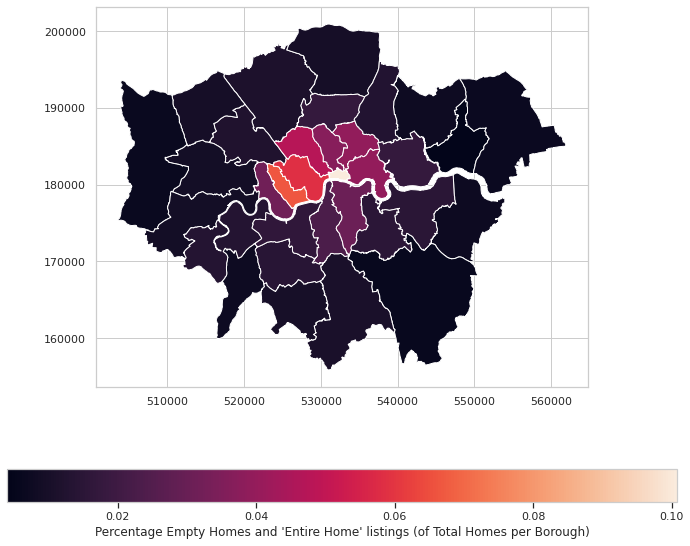

In [54]:
fig, ax = plt.subplots(1,1)

gdf.plot(column = 'Percent Unavailable 2019',
        ax=ax, 
        legend=True,
         legend_kwds={'label': "Percentage Empty Homes and 'Entire Home' listings (of Total Homes per Borough)",'orientation': "horizontal"})


Overall, inner London has a greater proportion of empty homes and 'entire home' listings. The City of London is impacted the most, although it may appear higher due the low number of homes.

### Are empty homes and 'entire home' listings related?

To consider whether there is a trend between the density of 'entire home' listings and the density of empty homes, a linear regression has been fitted for the two variables. The resultant plot is provided below.

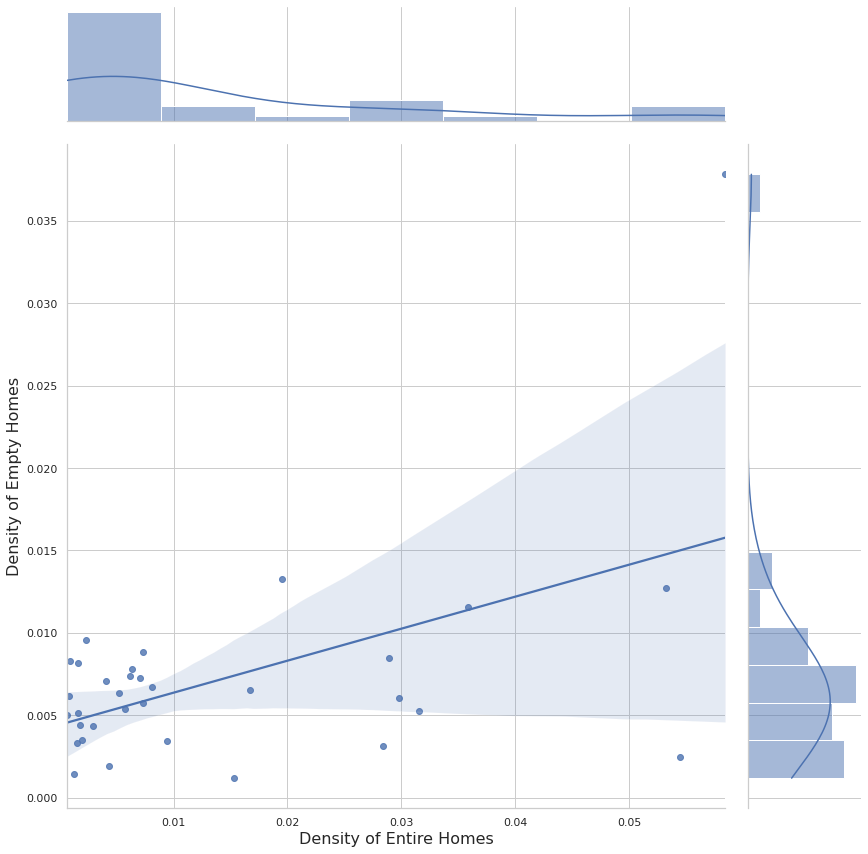

In [39]:
sns.set_style("whitegrid")
ax = sns.jointplot(x='Density of Entire Homes_abnb', y = 'Density of Empty Homes_empty', data=geotypes, kind='reg', height=12)
ax.set_axis_labels('Density of Entire Homes', ylabel='Density of Empty Homes', fontsize=16)
plt.show()

From the above, there is evidence to suggest correlation between the two variables. The $R^{2}$ value is 0.27. In addition, the majority of boroughs have both low proportions of ‘entire home’ Airbnb listings and empty homes. This suggests that the central boroughs impacted by both empty homes and Airbnb listings are extreme cases.

### How does this compare to housing targets?

The total number of empty homes and Airbnb 'entire home' listings (from now on referred to as opportunity homes ) have been summed and taken as a proportion of the total housing targets per borough in the draft London Plan (Mayor of London, 2019). The resultant plot per borough is provided below.

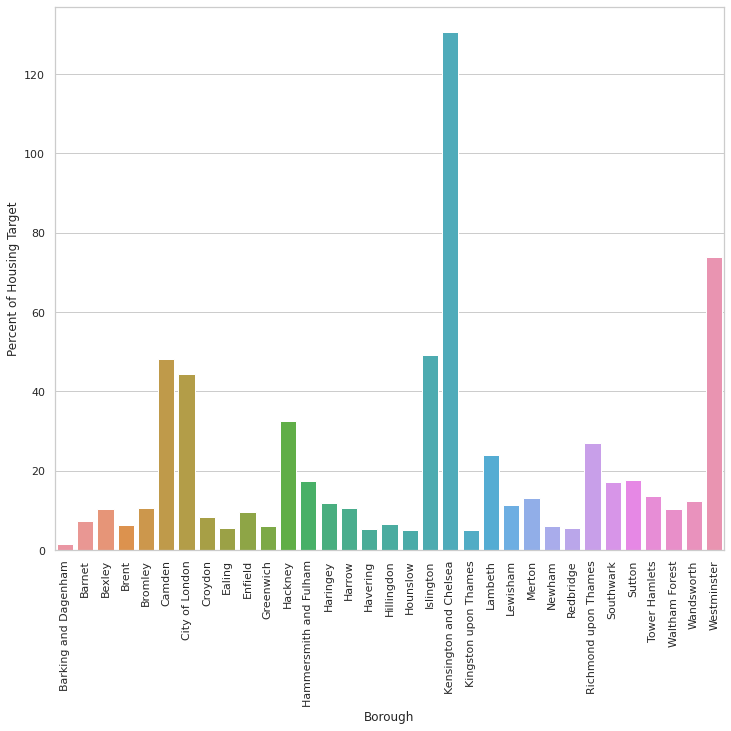

In [40]:
#plot the bar chart
ax = sns.barplot(x="Borough", y="Percent of Housing Target", data=housingtargets)
plt.xticks(rotation=90)
plt.show()


It is noteworthy that there are more opportunity homes in Kensington and Chelsea than the housing target for the borough. The above data has been mapped below to provide context on locations.

<AxesSubplot:>

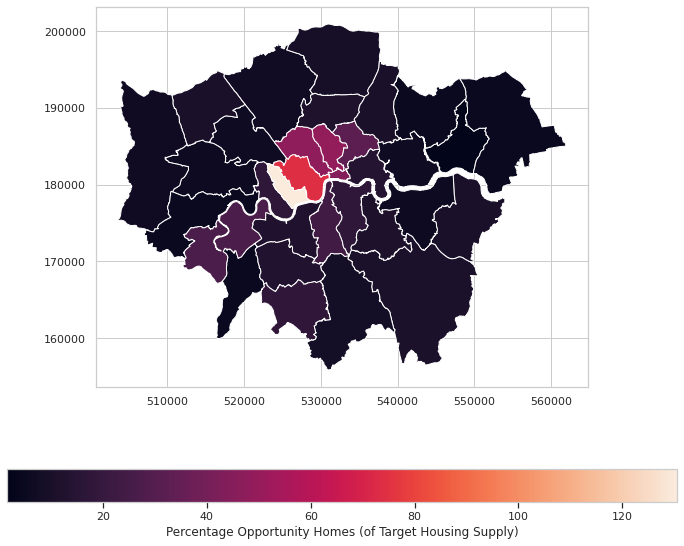

In [52]:
gdf = gpd.GeoDataFrame(geotypes, crs = "epsg:27700")

fig, ax = plt.subplots(1,1)

gdf.plot(column = 'Percent of Housing Target',
        ax=ax, 
        legend=True,
         legend_kwds={'label': "Percentage Opportunity Homes (of Target Housing Supply)",'orientation': "horizontal"})

It is evident from the above that the inner London boroughs have the largest opportunity to reclaim housing for residents. Some outer boroughs to the south-west also have some opportunity. The analysis suggests that residents are being pushed further away from the centre by both Airbnb listings and the empty homes problem. In addition to this problem, property prices are much higher in inner London (Office for National Statistics, 2018), which may create further inequality.

## Conclusions

To conclude, this analysis has provided the Mayor of London with an insight into the combined effects of empty homes and ‘entire home’ Airbnb listings on London’s housing. There is clear evidence that tackling empty homes and the misuse of Airbnb is an opportunity to significantly aid the initiative for supplying housing in London. There is some spatial correlation between empty homes and 'entire home' Airbnb listings. The results indicate the problem is significant in a small number of boroughs but is not significant in the majority. It is possible that this problem will worsen due to evidence of non-compliance on Airbnb and no clear method for monitoring in the future.  
  
In more constrained and central boroughs such as the City of London and Kensington and Chelsea, converting unused homes would have a particularly large impact and change the spatial supply dynamics. The analysis clearly shows that addressing the issue of empty homes and ‘entire home’ listings on Airbnb could substantially contribute to meeting housing targets, particularly in inner London. This would reduce the likelihood for residents to be pushed to outer boroughs in the future.


## Recommendations

It is evident the problem is growing over time, however additional analysis on this situation over time may be useful to predict future outcomes to inform policy. Scenario planning is advised given uncertainty in the current climate due to Brexit and the Covid-19 Pandemic. Analysis of geodemographics from the 2021 Census and it's change from the 2011 Census will be valuable in comprehending wealth disparity and migration between inner and outer London.  
  
Additionally, data collection on Airbnb and empty homes would benefit from regular updates and methodological improvement.  
  
Finally, a review on policy relating to second homes and foreign investors is recommended, with the key aim of understanding how to reduce the likelihood for continued foreign investment in central London. The review should include an economic appraisal of benefits Airbnb brings to London in comparison to the negative impacts outlined in this report. Foreign investment is not inherently negative and does not explicitly create a problem of empty homes, but it should be considered with the wider implications of housing in London. The focus should be on second and empty homes.


## Bibliography

Action on Empty Homes, 2019. Empty Homes in England 2019.  

Action on Empty Homes, 2020. Homes Without Residents.  
  
Cobbold, C., 2007. What is the Extent of Buy to Leave Empty in England? Communities and Local Government 20.  
  
Inside Airbnb. Adding data to the debate. [WWW Document], n.d. . Inside Airbnb. URL http://insideairbnb.com (accessed 11.25.20).  
  
Mayor of London, 2019. The London Plan Intend to Publish.  
  
Mayor of London, 2017. Strategic Housing Land Availability Assessment.  
  
Ministry of Housing, Communities and Local Government (MHCLG), 2020. Vacant Dwellings - London Datastore. URL https://data.london.gov.uk/dataset/vacant-dwellings (accessed 1.13.21).  
  
Office for National Statistics, 2018. Exploring recent trends in the London housing market - Office for National Statistics [WWW Document]. URL https://www.ons.gov.uk/economy/inflationandpriceindices/articles/exploringrecenttrendsinthelondonhousingmarket/2018-09-19 (accessed 1.13.21).  
  
Key Nest, 2019. Understanding Airbnb regulations in London [WWW Document]. KeyNest - Smart Key Exchange. URL https://keynest.com/blog/airbnb-regulations-london.  
  
Wilmore, J., 2020. Councils call for clampdown as one in 50 London homes found to be Airbnb-style lets [WWW Document]. Inside Housing. URL https://www.insidehousing.co.uk/news/news/councils-call-for-clampdown-as-one-in-50-london-homes-found-to-be-airbnb-style-lets--64783 (accessed 1.13.21).  
  
Temperton, J., 2020. Airbnb has devoured London – and here’s the data that proves it | WIRED UK.  
